In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten ,LSTM,RepeatVector,TimeDistributed
from keras.layers import  Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras. preprocessing import sequence
from operator import itemgetter
from re import L

In [3]:
data = pd.read_pickle("/content/drive/MyDrive/hr(tuples).pkl")

In [4]:
def getter(x):
    if isinstance(x,tuple):
        return itemgetter(0)(x)
    else:
        return x


In [5]:
print(data)

      Participant           Stage       0:0.0  0:0.099791  0:0.199582  \
0              22        STIMULUS   (87, 602)   (87, 602)   (87, 602)   
1              22  QUESTIONNAIRES   (85, 921)   (85, 921)   (85, 921)   
2              22         WASHOUT   (80, 749)   (80, 792)   (80, 792)   
3              22        STIMULUS   (81, 719)   (81, 719)   (81, 719)   
4              22  QUESTIONNAIRES   (83, 702)   (82, 702)   (83, 702)   
...           ...             ...         ...         ...         ...   
1339           64        STIMULUS   (78, 516)   (78, 516)   (78, 516)   
1340           64  QUESTIONNAIRES   (77, 799)   (77, 799)   (77, 816)   
1341           64         WASHOUT    (0, 987)    (0, 987)    (0, 987)   
1342           64        STIMULUS   (69, 829)   (68, 829)   (69, 829)   
1343           64  QUESTIONNAIRES  (66, 1245)  (65, 1245)  (65, 1245)   

     0:0.299373  0:0.399164 0:0.49895500000000004  0:0.598746  \
0     (87, 602)   (87, 602)             (87, 602)   (87, 6

In [6]:
data['Participant'].value_counts()


22    32
54    32
46    32
47    32
48    32
49    32
50    32
51    32
52    32
53    32
55    32
23    32
56    32
57    32
58    32
59    32
60    32
61    32
62    32
63    32
45    32
44    32
43    32
42    32
24    32
25    32
26    32
27    32
28    32
29    32
31    32
32    32
33    32
34    32
35    32
36    32
37    32
38    32
39    32
40    32
41    32
64    32
Name: Participant, dtype: int64

In [7]:
parti_s=pd.unique(data['Participant'])

In [8]:
data['Target'].value_counts()

NEUTRAL       126
AWE           126
DISGUST       126
SURPRISE      126
ANGER         126
ENTHUSIASM    126
LIKING        126
FEAR          126
AMUSEMENT     126
SADNESS       126
BASELINE       84
Name: Target, dtype: int64

In [9]:
df = data.iloc[: ,:-12]

In [10]:
df

,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,22,STIMULUS,"(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 406)",...,None,None,None,None,None,None,None,None,None,BASELINE
1,22,QUESTIONNAIRES,"(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)",...,None,None,None,None,None,None,None,None,None,BASELINE
2,22,WASHOUT,"(80, 749)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(79, 792)","(79, 792)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
3,22,STIMULUS,"(81, 719)","(81, 719)","(81, 719)","(81, 719)","(81, 734)","(81, 734)","(81, 734)","(81, 734)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
4,22,QUESTIONNAIRES,"(83, 702)","(82, 702)","(83, 702)","(83, 702)","(83, 702)","(82, 702)","(82, 702)","(82, 702)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,64,STIMULUS,"(78, 516)","(78, 516)","(78, 516)","(78, 634)","(78, 634)","(78, 634)","(78, 634)","(78, 634)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
1340,64,QUESTIONNAIRES,"(77, 799)","(77, 799)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
1341,64,WASHOUT,"(0, 987)","(0, 987)","(0, 987)","(0, 987)","(-10, 987)","(-10, 987)","(-10, 987)","(-10, 987)",...,None,None,None,None,None,None,None,None,None,AWE
1342,64,STIMULUS,"(69, 829)","(68, 829)","(69, 829)","(69, 829)","(69, 829)","(69, 1248)","(68, 1248)","(68, 1248)",...,None,None,None,None,None,None,None,None,None,AWE


In [11]:
mask = data["Stage"] == "STIMULUS"
mask2 = data["Participant"] ==  22 
##hr_df = df.loc[mask , [*data.columns[0:6305]]].applymap(lambda x:getter(x))
hr_df_22=data.loc[mask&mask2,[*data.columns[0:1000],*data.columns[-13:-12]]].applymap(lambda x:getter(x))

In [12]:
hr_df_22

,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,1:38.69329900000001,1:38.79309000000001,1:38.892881,1:38.992672,1:39.09246300000001,1:39.192254000000005,1:39.292045,1:39.391836,1:39.49162700000001,Target
0,22,STIMULUS,87,87,87,87,87,87,87,87,...,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,BASELINE
3,22,STIMULUS,81,81,81,81,81,81,81,81,...,78.0,78.0,79.0,78.0,78.0,78.0,79.0,78.0,78.0,NEUTRAL
6,22,STIMULUS,85,85,85,85,85,86,86,86,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,79.0,80.0,AWE
9,22,STIMULUS,85,86,85,86,85,85,85,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISGUST
12,22,STIMULUS,83,83,83,83,83,82,83,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SURPRISE
15,22,STIMULUS,78,78,78,78,78,78,78,78,...,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,ANGER
18,22,STIMULUS,79,78,78,78,78,78,78,78,...,78.0,78.0,77.0,78.0,78.0,78.0,78.0,77.0,77.0,ENTHUSIASM
21,22,STIMULUS,78,77,78,78,78,78,78,78,...,78.0,78.0,78.0,78.0,79.0,79.0,79.0,79.0,79.0,LIKING
24,22,STIMULUS,79,79,79,79,79,79,79,78,...,74.0,73.0,74.0,73.0,73.0,72.0,73.0,72.0,72.0,FEAR
27,22,STIMULUS,77,77,77,77,77,77,77,77,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,AMUSEMENT


In [13]:
#hr_df.info()
hr_df_22.isna().sum().sum()

803

In [14]:
hr_df_22.fillna(0,inplace=True)

In [15]:
hr_df_22['Target'].value_counts()

BASELINE      1
NEUTRAL       1
AWE           1
DISGUST       1
SURPRISE      1
ANGER         1
ENTHUSIASM    1
LIKING        1
FEAR          1
AMUSEMENT     1
SADNESS       1
Name: Target, dtype: int64

In [16]:
#hr_df_22['Target'] = df['Target'].replace(['BASELINE','NEUTRAL','AWE','DISGUST','SURPRISE','ANGER','ENTHUSIASM','LIKING','FEAR','AMUSEMENT','SADNESS'], [0,0,1,1,1,1,1,1,1,1,1])

In [17]:
hr_df_22

,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,1:38.69329900000001,1:38.79309000000001,1:38.892881,1:38.992672,1:39.09246300000001,1:39.192254000000005,1:39.292045,1:39.391836,1:39.49162700000001,Target
0,22,STIMULUS,87,87,87,87,87,87,87,87,...,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,BASELINE
3,22,STIMULUS,81,81,81,81,81,81,81,81,...,78.0,78.0,79.0,78.0,78.0,78.0,79.0,78.0,78.0,NEUTRAL
6,22,STIMULUS,85,85,85,85,85,86,86,86,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,79.0,80.0,AWE
9,22,STIMULUS,85,86,85,86,85,85,85,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DISGUST
12,22,STIMULUS,83,83,83,83,83,82,83,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SURPRISE
15,22,STIMULUS,78,78,78,78,78,78,78,78,...,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,ANGER
18,22,STIMULUS,79,78,78,78,78,78,78,78,...,78.0,78.0,77.0,78.0,78.0,78.0,78.0,77.0,77.0,ENTHUSIASM
21,22,STIMULUS,78,77,78,78,78,78,78,78,...,78.0,78.0,78.0,78.0,79.0,79.0,79.0,79.0,79.0,LIKING
24,22,STIMULUS,79,79,79,79,79,79,79,78,...,74.0,73.0,74.0,73.0,73.0,72.0,73.0,72.0,72.0,FEAR
27,22,STIMULUS,77,77,77,77,77,77,77,77,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,AMUSEMENT


In [18]:
hr_df_22.dtypes

Participant               int64
Stage                    object
0:0.0                     int64
0:0.099791                int64
0:0.199582                int64
                         ...   
1:39.192254000000005    float64
1:39.292045             float64
1:39.391836             float64
1:39.49162700000001     float64
Target                   object
Length: 1001, dtype: object

In [19]:
hr_df_22.iloc[: , 2:-1]=hr_df_22.iloc[: , 2:-1].astype(float)

In [20]:
hr_df=hr_df_22.iloc[: , 2:]

In [21]:
hr_df.head(11)

,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,0:0.898119,...,1:38.69329900000001,1:38.79309000000001,1:38.892881,1:38.992672,1:39.09246300000001,1:39.192254000000005,1:39.292045,1:39.391836,1:39.49162700000001,Target
0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,88.0,...,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,BASELINE
3,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,...,78.0,78.0,79.0,78.0,78.0,78.0,79.0,78.0,78.0,NEUTRAL
6,85.0,85.0,85.0,85.0,85.0,86.0,86.0,86.0,86.0,86.0,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,79.0,80.0,AWE
9,85.0,86.0,85.0,86.0,85.0,85.0,85.0,85.0,85.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DISGUST
12,83.0,83.0,83.0,83.0,83.0,82.0,83.0,83.0,83.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SURPRISE
15,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,ANGER
18,79.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,77.0,78.0,78.0,78.0,78.0,77.0,77.0,ENTHUSIASM
21,78.0,77.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,79.0,...,78.0,78.0,78.0,78.0,79.0,79.0,79.0,79.0,79.0,LIKING
24,79.0,79.0,79.0,79.0,79.0,79.0,79.0,78.0,78.0,78.0,...,74.0,73.0,74.0,73.0,73.0,72.0,73.0,72.0,72.0,FEAR
27,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,AMUSEMENT


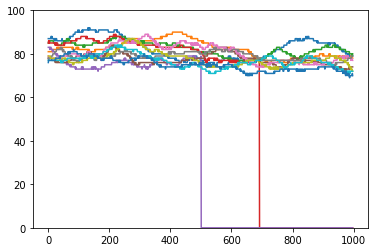

In [22]:
for i in range(11):
  plt.plot(hr_df.values[:,:-1][i])
  plt.ylim(0, 100) 

In [23]:
hr_df.describe()


,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,0:0.898119,...,1:38.593508,1:38.69329900000001,1:38.79309000000001,1:38.892881,1:38.992672,1:39.09246300000001,1:39.192254000000005,1:39.292045,1:39.391836,1:39.49162700000001
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,80.727273,80.727273,80.727273,80.818182,80.727273,80.727273,80.818182,80.727273,80.727273,80.909091,...,62.000000,62.090909,62.000000,62.090909,62.000000,62.090909,62.000000,62.181818,61.909091,61.909091
std,3.717282,3.875330,3.663084,3.789939,3.663084,3.744086,3.789939,3.849439,3.849439,3.961175,...,30.825314,30.855970,30.818825,30.859211,30.818825,30.872170,30.838288,30.925130,30.758591,30.787837
min,76.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,77.500000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,70.500000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.500000,71.000000
50%,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,78.000000,78.000000,79.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
75%,84.000000,84.000000,84.000000,84.000000,84.000000,83.500000,84.000000,84.000000,84.000000,84.000000,...,78.000000,78.000000,78.000000,78.500000,78.000000,78.500000,78.500000,79.000000,78.500000,78.500000
max,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,88.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,79.000000,80.000000


In [24]:
bas_22=hr_df.iloc[0,:]

In [25]:
bas_22=pd.DataFrame(bas_22)

In [26]:
bas_22=bas_22.iloc[:-1,:]

In [27]:
bas_22['time'] = bas_22.index
bas_22.reset_index(drop=True, inplace=True)

In [28]:
bas_22

,0,time
0,87.0,0:0.0
1,87.0,0:0.099791
2,87.0,0:0.199582
3,87.0,0:0.299373
4,87.0,0:0.399164
...,...,...
993,79.0,1:39.09246300000001
994,79.0,1:39.192254000000005
995,79.0,1:39.292045
996,79.0,1:39.391836


In [29]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [30]:
bas_22=swap_columns(bas_22,0,'time')

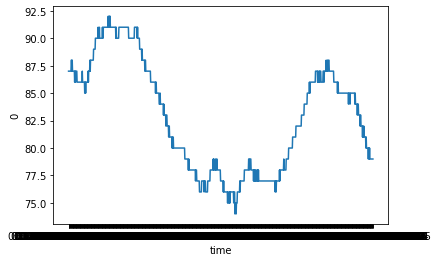

In [31]:
sns.lineplot(x=bas_22['time'],y=bas_22[0])

In [32]:
bas_22['time'] = ['00:'+x   for x in bas_22['time']]

In [33]:
bas_22

,time,0
0,00:0:0.0,87.0
1,00:0:0.099791,87.0
2,00:0:0.199582,87.0
3,00:0:0.299373,87.0
4,00:0:0.399164,87.0
...,...,...
993,00:1:39.09246300000001,79.0
994,00:1:39.192254000000005,79.0
995,00:1:39.292045,79.0
996,00:1:39.391836,79.0


In [34]:
bas_22['time'] = pd.to_timedelta(bas_22['time'])

In [35]:
bas_22.describe()

,time
count,998
mean,0 days 00:00:49.745813499
std,0 days 00:00:28.763965979
min,0 days 00:00:00
25%,0 days 00:00:24.872906750
50%,0 days 00:00:49.745813500
75%,0 days 00:01:14.618720250
max,0 days 00:01:39.491627


In [36]:
train,test=bas_22.iloc[:-250,:],bas_22.iloc[-250:,:]

In [37]:
train

,time,0
0,0 days 00:00:00,87.0
1,0 days 00:00:00.099791,87.0
2,0 days 00:00:00.199582,87.0
3,0 days 00:00:00.299373,87.0
4,0 days 00:00:00.399164,87.0
...,...,...
743,0 days 00:01:14.144713,81.0
744,0 days 00:01:14.244504,81.0
745,0 days 00:01:14.344295,82.0
746,0 days 00:01:14.444085999,82.0


In [38]:
test

,time,0
748,0 days 00:01:14.643668,82.0
749,0 days 00:01:14.743459,82.0
750,0 days 00:01:14.843249999,82.0
751,0 days 00:01:14.943041,82.0
752,0 days 00:01:15.042832,82.0
...,...,...
993,0 days 00:01:39.092463,79.0
994,0 days 00:01:39.192254,79.0
995,0 days 00:01:39.292045,79.0
996,0 days 00:01:39.391836,79.0


In [39]:
seq_size=50

In [40]:
def to_seq(x,y,seq_size=1):
  x_values=[]
  y_values=[]
  for i in range(len(x)-seq_size):
    x_values.append(x.iloc[i:(i+seq_size)].values)
    y_values.append(y.iloc[seq_size])
  return np.array(x_values),np.array(y_values)

In [41]:
trainX,trainY=to_seq(train[[0]],train[0],seq_size)
testX,testY=to_seq(test[[0]],test[0],seq_size)

In [42]:
trainX.shape

(698, 50, 1)

In [43]:
train.shape

(748, 2)

In [44]:
trainY.shape

(698,)

In [45]:
model=Sequential()
model.add(LSTM(128,input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=False))
#model.add(LSTM(64,activation='relu',return_sequences=False))

model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))


#model.add(LSTM(64,activation='relu',return_sequences=True))

model.add(LSTM(128,return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 50, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 50, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 50, 1)            129       
 ibuted)                                                

In [53]:
trainX = np.asarray(trainX).astype(np.float32)
trainY = np.asarray(trainY).astype(np.float32)
testX = np.asarray(testX).astype(np.float32)
testY = np.asarray(testY).astype(np.float32)

In [49]:
h=model.fit(trainX,trainY,epochs=200,batch_size=50,validation_split=0.1,verbose=1)

Epoch 1/200
13/13 [==============================] - 3s 209ms/step - loss: 54.5075 - accuracy: 0.0000e+00 - val_loss: 53.5447 - val_accuracy: 0.0000e+00
Epoch 2/200
13/13 [==============================] - 3s 207ms/step - loss: 52.7601 - accuracy: 0.0000e+00 - val_loss: 51.7648 - val_accuracy: 0.0000e+00
Epoch 3/200
13/13 [==============================] - 3s 228ms/step - loss: 50.9820 - accuracy: 0.0000e+00 - val_loss: 49.9944 - val_accuracy: 0.0000e+00
Epoch 4/200
13/13 [==============================] - 3s 199ms/step - loss: 49.2114 - accuracy: 0.0000e+00 - val_loss: 48.2492 - val_accuracy: 0.0000e+00
Epoch 5/200
13/13 [==============================] - 3s 202ms/step - loss: 47.4665 - accuracy: 0.0000e+00 - val_loss: 46.5119 - val_accuracy: 0.0000e+00
Epoch 6/200
13/13 [==============================] - 3s 208ms/step - loss: 45.7521 - accuracy: 0.0000e+00 - val_loss: 44.7823 - val_accuracy: 0.0000e+00
Epoch 7/200
13/13 [==============================] - 3s 218ms/step - loss: 44.0127

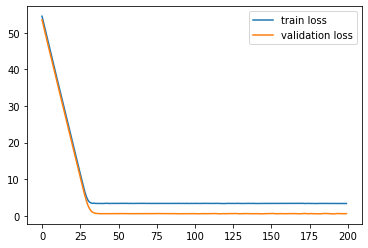

In [50]:
plt.plot(h.history['loss'],label="train loss")
plt.plot(h.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

In [ ]:
###########################
##Anomaly is where reconstruction error is large.
##We can define this value beyond which we call anomaly.
##Let us look at MAE in training prediction

#trainPredict = model.predict(trainX)
#trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
#plt.hist(trainMAE, bins=30)
#max_trainMAE = 0.3  #or Define 90% value of max as threshold.
#
#testPredict = model.predict(testX)
#testMAE = np.mean(np.abs(testPredict - testX), axis=1)
#plt.hist(testMAE, bins=30)
#
##Capture all details in a DataFrame for easy plotting
#anomaly_df = pd.DataFrame(test[seq_size:])
#anomaly_df['testMAE'] = testMAE
#anomaly_df['max_trainMAE'] = max_trainMAE
#anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
#anomaly_df['Close'] = test[seq_size:]['Close']
#
##Plot testMAE vs max_trainMAE
#sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['testMAE'])
#sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_trainMAE'])
#
#anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
#
##Plot anomalies
#sns.lineplot(x=anomaly_df['Date'], y=scaler.inverse_transform(anomaly_df['Close']))
#sns.scatterplot(x=anomalies['Date'], y=scaler.inverse_transform(anomalies['Close']), color='r')

22/22 [==============================] - 2s 69ms/step


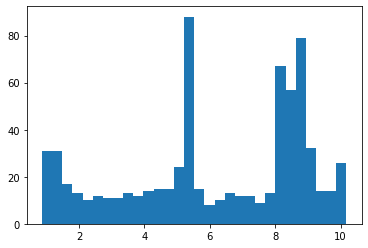

In [79]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)
max_trainMAE =3

7/7 [==============================] - 0s 53ms/step


(array([18., 18., 37., 56., 14.,  6.,  5.,  4.,  5.,  3.,  4.,  2.,  2.,
         2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,
         2.,  1.,  2.,  2.]),
 array([0.8767087, 1.0222548, 1.1678009, 1.313347 , 1.4588931, 1.6044391,
        1.7499852, 1.8955314, 2.0410774, 2.1866236, 2.3321695, 2.4777157,
        2.623262 , 2.768808 , 2.914354 , 3.0599   , 3.2054462, 3.3509924,
        3.4965384, 3.6420846, 3.7876306, 3.9331768, 4.078723 , 4.224269 ,
        4.369815 , 4.5153613, 4.6609073, 4.806453 , 4.951999 , 5.0975456,
        5.2430916], dtype=float32),
 <a list of 30 Patch objects>)

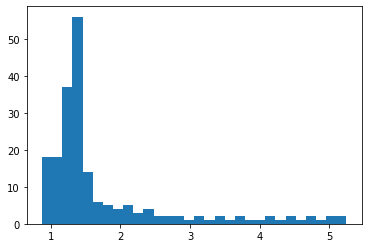

In [80]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)


In [81]:
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df[0] = test[seq_size:][0]

In [82]:
anomaly_df

,time,0,testMAE,max_trainMAE,anomaly
798,0 days 00:01:19.633218,86.0,2.410420,3,False
799,0 days 00:01:19.733009,86.0,2.335387,3,False
800,0 days 00:01:19.832800,86.0,2.260354,3,False
801,0 days 00:01:19.932591,86.0,2.185321,3,False
802,0 days 00:01:20.032382,86.0,2.110288,3,False
...,...,...,...,...,...
993,0 days 00:01:39.092463,79.0,4.863097,3,True
994,0 days 00:01:39.192254,79.0,4.963097,3,True
995,0 days 00:01:39.292045,79.0,5.023097,3,True
996,0 days 00:01:39.391836,79.0,5.123091,3,True


In [83]:
anomaly_df['anomaly'].value_counts()

False    177
True      23
Name: anomaly, dtype: int64

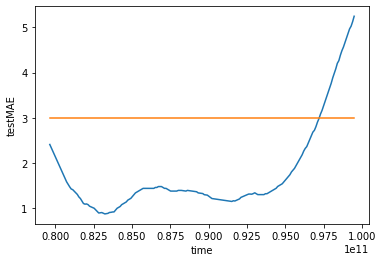

In [84]:
sns.lineplot(x=anomaly_df['time'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['time'], y=anomaly_df['max_trainMAE'])

In [85]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

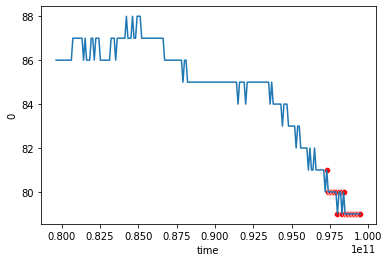

In [86]:
sns.lineplot(x=anomaly_df['time'], y=anomaly_df[0])
sns.scatterplot(x=anomalies['time'], y=anomalies[0], color='r')

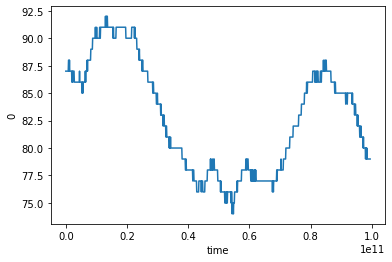

In [87]:
sns.lineplot(x=bas_22['time'],y=bas_22[0])